In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
iris = load_iris()
X = iris.data
y = iris.target

print("Features:", iris.feature_names)
print("Target Classes:", iris.target_names)


Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Classes: ['setosa' 'versicolor' 'virginica']


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [5]:
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K={k}, Accuracy={acc:.2f}")


K=1, Accuracy=0.97
K=3, Accuracy=1.00
K=5, Accuracy=1.00
K=7, Accuracy=1.00
K=9, Accuracy=1.00


In [6]:
best_k = 3
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



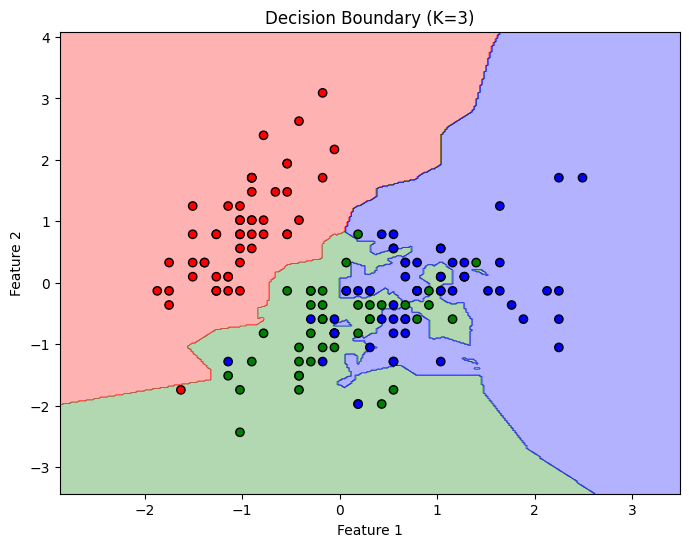

In [7]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(X, y, model, title):
    X = X[:, :2]  # using only 2 features for 2D visualization
    model.fit(X, y)
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(('red', 'green', 'blue')))
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(X_scaled, y, KNeighborsClassifier(n_neighbors=3), "Decision Boundary (K=3)")
